---
title: "Correlation within Crypto-currencies"
subtitle: "주요 암호화폐 수익률들의 선형 상관계수 분석"
author: "gitSAM"
date: "2025-03-08"

bibliography: references.bib
format:
  html:
    code-fold: true
    toc: true
jupyter: python3
---

Abstract: 2025년 3월 현재, 시가총액이 크거나 투자자들에게 인기가 많은 주요 암호화폐(popular cryptocurrencies)를 선정하여 지난 1년간의 상관관계를 분석하였다. 대부분의 암호화폐 투자자들은 이러한 주요 암호화폐에 집중적으로 투자하는 경향이 있다. 한편, 암호화폐 자산에 대한 투자자의 평균 투자 기간은 단기(short-term)로, 일반적으로 1개월에서 3개월 사이에 해당한다. 이에 따라 본 연구에서는 데이터의 관측 빈도(observation frequency)를 일간(daily) 단위로 설정하고, 30일, 60일, 90일의 롤링 윈도우(rolling window)를 적용하여 주요 암호화폐 수익률의 선형 상관계수(Pearson's coefficient)를 분석하였다. 이러한 분석은 변동성 헤징(volatility hedging)을 고려한 분산 투자(diversified investment) 전략 수립에 도움이 될 수 있다. 예를 들어, 일정한 투자 금액(예: 1억 원)을 주요 암호화폐 자산군 내에서 어떻게 배분할지 결정하는 데 있어, 상관계수 분석 결과가 투자 비중 조정에 유용한 정보를 제공할 것으로 기대된다.

## 서론

비트코인(BTC)의 가격 및 수익률은, 단기적으로 다음과 같은 관계를 보여왔다. 

- NDX (나스닥 100 지수)와 강한 양의 상관관계 [@nasdaq2024 ; @nasdaq2023], 
- DXY (미국 달러 지수)와 강한 음의 상관관계 [@coindesk2023 ; @coinglass2023]. 만약 비트코인 가격이 달러 가격과 장기적으로도 반대 방향으로 움직인다면, 이는 비트코인이 인플레이션 헤지 자산으로 간주될 수도 있을 가능성을 나타낸다 [@science2021]. 
- 금 가격 (GOLD), 국내 실질 총생산량 (GDP) 과의 상관관계는 불명확하거나 간접적인 것으로 알려져 있음 [@cointelegraph2023 ; @cryptoslate2022].

역사적 사례 

- 2020년 COVID-19 위기 이후 BTC와 NDX의 상관관계가 강화됨 [@nasdaq2020], 
- 2022년 5월 연방준비제도(Fed)의 금리 인상 발표 당시, BTC와 NDX 모두 하락.
- 2023년 비트코인 빙하기 기간 동안 BTC와 NDX의 상관관계 변화 분석 필요.
- 2024년 3월 비트코인 ETF가 출시하여 기관 투자자 참여가 증가와 함께께 BTC과 NDX의 coupling이 심해짐.  


### 주요 암호화폐 목록 및 카테고리

| 암호화폐 (Cryptocurrency) | 심볼 (Ticker) | 카테고리 (Category)         |
|---------------------|------------|-----------------------|
| 비트코인 (Bitcoin) | BTC/USD    | Layer 1               |
| 이더리움 (Ethereum) | ETH/USD    | Layer 1, Smart Contract |
| 테더 (Tether)      | USDT/USD   | Stablecoin            |
| 리플 (XRP)        | XRP/USD    | Payment Network       |
| 솔라나 (Solana)    | SOL/USD    | Layer 1               |
| 체인링크 (Chainlink) | LINK/USD    | Oracle                |
| 온도 (Ondo)       | ONDO/USD   | Real-World Asset (RWA) |
| 카르다노 (Cardano) | ADA/USD    | Layer 1               |
| 트론 (Tron)       | TRX/USD    | Layer 1               |
| 도지코인 (Dogecoin) | DOGE/USD    | Meme Coin             |

### 암호화폐 관련 정보 제공 매체 리뷰

- **시세 데이터 (Price Data):** 실시간 및 과거 가격 변동, 거래량(volume) 등
  - [CoinMarketCap](https://coinmarketcap.com/)
  - [CoinGecko](https://www.coingecko.com/)
- **온체인 데이터 (On-Chain Data):** 거래량, 지갑 주소 변화, 네트워크 활성도 등
  - [Glassnode](https://glassnode.com/)
  - [IntoTheBlock](https://intotheblock.com/)
- **시장 분석 (Market Analysis):** 전문가 및 AI 기반 분석 리포트
  - [Messari](https://messari.io/)
  - [CryptoQuant](https://cryptoquant.com/)
- **뉴스 및 이벤트 (News & Events):** 프로젝트 업데이트, 규제 변화 등
  - [CoinDesk](https://www.coindesk.com/)
  - [The Block](https://www.theblock.co/)
- **소셜 미디어 분석 (Social Media Analysis):** 트위터(X), 레딧(Reddit) 등에서의 커뮤니티 반응
  - [LunarCrush](https://lunarcrush.com/)
  - [Santiment](https://santiment.net/)


## 데이터 분석

### 데이터

- **데이터 소스:** [CCXT](https://github.com/ccxt/ccxt)
- **데이터 기간:** 2024년 3월 1일 - 2025년 2월 28일
- **데이터 빈도 (Data Frequency):** 일간(Daily)
- **분석 대상 암호화폐:**
  - `BTC/USD, ETH/USD, USDT/USD, XRP/USD, SOL/USD, LINK/USD, ONDO/USD, ADA/USD, TRX/USD, DOGE/USD`
- **롤링 윈도우 크기 (Rolling Window Size):** 30일, 60일, 90일

### 분석 방법

- 암호화폐의 **일간 수익률(daily return)**을 계산.
- 각 롤링 윈도우 크기(30, 60, 90일)에 대해 **롤링 상관 행렬(rolling correlation matrix)**을 계산.
- 평균 상관계수(mean of rolling correlation matrix)를 도출하여 암호화폐 간의 관계를 분석.

In [ ]:
# 분석 결과 (Results)

# 여러 거래소에서 지원하는 거래쌍을 확인

import ccxt
import pandas as pd

# 주요 암호화폐 목록
TICKER_COIN = ['BTC/USDT', 'ETH/USDT', 'USDT/USD', 'XRP/USDT', 'SOL/USDT', 'LINK/USDT', 'ONDO/USDT', 'ADA/USDT', 'TRX/USDT', 'DOGE/USDT']

# 지원하는 거래소 목록
exchanges = ['binance', 'kraken', 'bitfinex', 'poloniex']

# 각 거래소에서 지원하는 거래쌍 확인
for exchange_id in exchanges:
    exchange = getattr(ccxt, exchange_id)()
    markets = exchange.load_markets()
    supported_pairs = [pair for pair in TICKER_COIN if pair in markets]
    print(f"{exchange_id} supports: {supported_pairs}")

# 주요 암호화폐 목록
binance_tickers = ['BTC/USDT', 'ETH/USDT', 'XRP/USDT', 'SOL/USDT', 'LINK/USDT', 'ADA/USDT', 'TRX/USDT', 'DOGE/USDT']
kraken_tickers = ['USDT/USD']
poloniex_tickers = ['ONDO/USDT']

# 데이터 기간 설정
START_DATE = '2024-03-01'
END_DATE = '2025-02-28'

# 거래소 설정
binance = ccxt.binance()
kraken = ccxt.kraken()
poloniex = ccxt.poloniex()

# 데이터 불러오기 함수
def fetch_crypto_data(exchange, tickers, start, end):
    data = {}
    start_timestamp = exchange.parse8601(f'{start}T00:00:00Z')
    end_timestamp = exchange.parse8601(f'{end}T00:00:00Z')
    for ticker in tickers:
        try:
            ohlcv = exchange.fetch_ohlcv(ticker, '1d', since=start_timestamp, limit=1000)
            df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
            df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
            df.set_index('timestamp', inplace=True)
            data[ticker] = df['close']
        except Exception as e:
            print(f"Error fetching {ticker} from {exchange.id}: {e}")
    return pd.DataFrame(data)

# 데이터 불러오기
binance_data = fetch_crypto_data(binance, binance_tickers, START_DATE, END_DATE)
kraken_data = fetch_crypto_data(kraken, kraken_tickers, START_DATE, END_DATE)
poloniex_data = fetch_crypto_data(poloniex, poloniex_tickers, START_DATE, END_DATE)

# 모든 데이터를 하나의 DataFrame으로 병합
crypto_prices = pd.concat([binance_data, kraken_data, poloniex_data], axis=1)

# 1) 일간 수익률 계산
def compute_returns(price_data: pd.DataFrame) -> pd.DataFrame:
    return price_data.pct_change().dropna(how='all')

crypto_returns = compute_returns(crypto_prices)

# 2) 롤링 상관계수 계산
def rolling_correlation(returns: pd.DataFrame, window: int) -> pd.DataFrame:
    """
    returns: (date x tickers) DataFrame
    window:  rolling window size (days)
    
    returns.rolling(window).corr() 결과는
      - MultiIndex (date, ticker1)
      - columns = ticker2
    형태를 가집니다.
    """
    corr_rolling = returns.rolling(window).corr()
    return corr_rolling

# 3) 날짜별 상관행렬을 모아서 평균 상관행렬을 산출
def average_correlation_matrix(returns: pd.DataFrame, window: int) -> pd.DataFrame:
    """
    - returns.rolling(window).corr() 결과를 사용
    - 각 날짜별 (티커 x 티커) 상관행렬을 합산 후, 날짜 개수로 나누어 평균
    """
    corr_rolling = rolling_correlation(returns, window)
    
    # MultiIndex에서 날짜(level=0) 목록을 추출
    unique_dates = corr_rolling.index.get_level_values(0).unique()
    tickers = returns.columns
    
    # 상관행렬 누적 합을 위한 (티커 x 티커) 형태의 빈 DataFrame
    sum_matrix = pd.DataFrame(0.0, index=tickers, columns=tickers)
    count = 0
    
    for date in unique_dates:
        # (ticker1 x ticker2) 형태를 얻기 위해 xs(date, level=0)
        date_corr = corr_rolling.xs(date, level=0)
        # date_corr.index = ticker1, date_corr.columns = ticker2
        
        # 혹시 일부 티커에 대한 데이터가 누락되었을 경우를 대비하여 reindex
        date_corr = date_corr.reindex(index=tickers, columns=tickers)
        
        # 날짜별 상관행렬(N x N)을 모두 누적
        if date_corr.notna().all().all():
            sum_matrix += date_corr.fillna(0.0)
            count += 1
    
    # 평균 계산 (count가 0이 되지 않는다고 가정)
    mean_matrix = sum_matrix / count
    
    return mean_matrix

# 4) 롤링 상관계수 평균 계산
rolling_corr_results = {}
for window in [30, 60, 90]:
    mean_corr_matrix = average_correlation_matrix(crypto_returns, window)
    rolling_corr_results[window] = mean_corr_matrix


[Window = 30 days] Mean Correlation Matrix
            BTC/USDT  ETH/USDT  XRP/USDT  SOL/USDT  LINK/USDT  ADA/USDT  TRX/USDT  DOGE/USDT  USDT/USD  ONDO/USDT
BTC/USDT   1.000000  0.794944  0.558558  0.737737   0.677522  0.701103  0.376256   0.809243  0.444585   0.347845
ETH/USDT   0.794944  1.000000  0.547942  0.697216   0.731421  0.716019  0.372601   0.740277  0.276001   0.377105
XRP/USDT   0.558558  0.547942  1.000000  0.540649   0.558001  0.642714  0.311015   0.580709  0.154604   0.221013
SOL/USDT   0.737737  0.697216  0.540649  1.000000   0.666779  0.678010  0.311352   0.686835  0.242019   0.297572
LINK/USDT  0.677522  0.731421  0.558001  0.666779   1.000000  0.756882  0.305050   0.659840  0.222507   0.411178
ADA/USDT   0.701103  0.716019  0.642714  0.678010   0.756882  1.000000  0.411873   0.722573  0.250521   0.329912
TRX/USDT   0.376256  0.372601  0.311015  0.311352   0.305050  0.411873  1.000000   0.361568  0.171432   0.110439
DOGE/USDT  0.809243  0.740277  0.580709  0.686835  

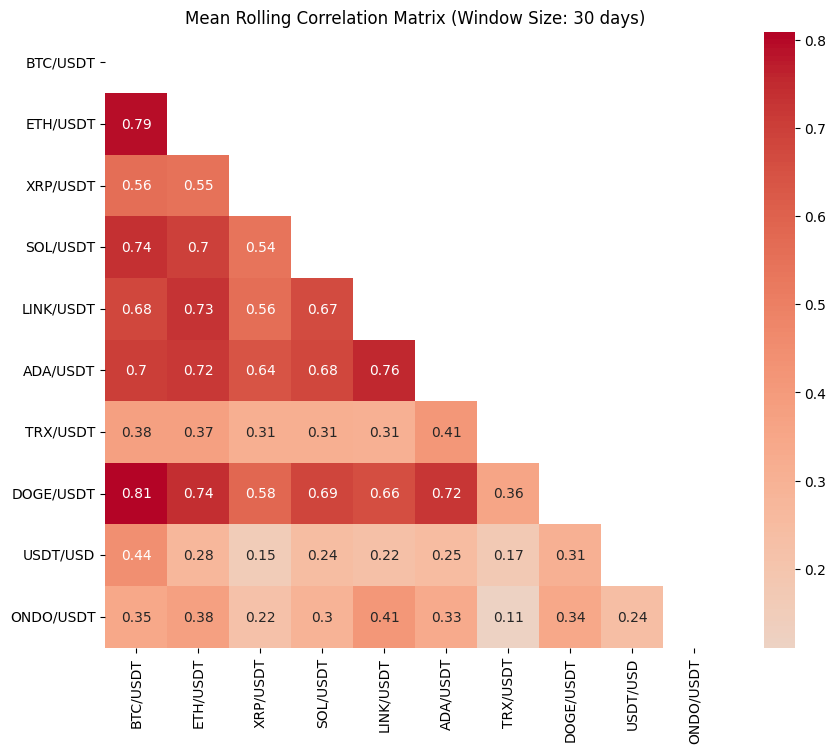


[Window = 60 days] Mean Correlation Matrix
            BTC/USDT  ETH/USDT  XRP/USDT  SOL/USDT  LINK/USDT  ADA/USDT  TRX/USDT  DOGE/USDT  USDT/USD  ONDO/USDT
BTC/USDT   1.000000  0.793336  0.504536  0.738615   0.657428  0.685435  0.308618   0.811538  0.436205   0.344827
ETH/USDT   0.793336  1.000000  0.486503  0.687386   0.704034  0.689170  0.295049   0.720545  0.283725   0.369484
XRP/USDT   0.504536  0.486503  1.000000  0.492021   0.526343  0.621194  0.260993   0.527630  0.118721   0.199266
SOL/USDT   0.738615  0.687386  0.492021  1.000000   0.648663  0.664560  0.265543   0.682865  0.234511   0.283439
LINK/USDT  0.657428  0.704034  0.526343  0.648663   1.000000  0.743236  0.245949   0.630109  0.204343   0.396549
ADA/USDT   0.685435  0.689170  0.621194  0.664560   0.743236  1.000000  0.366067   0.707372  0.235223   0.314460
TRX/USDT   0.308618  0.295049  0.260993  0.265543   0.245949  0.366067  1.000000   0.293822  0.144161   0.086821
DOGE/USDT  0.811538  0.720545  0.527630  0.682865  

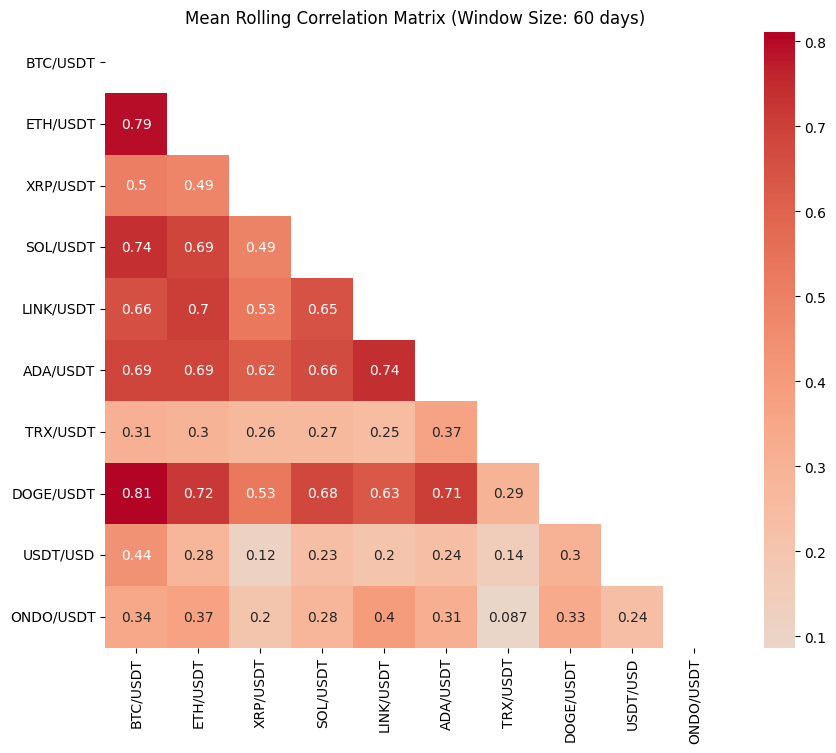


[Window = 90 days] Mean Correlation Matrix
            BTC/USDT  ETH/USDT  XRP/USDT  SOL/USDT  LINK/USDT  ADA/USDT  TRX/USDT  DOGE/USDT  USDT/USD  ONDO/USDT
BTC/USDT   1.000000  0.791938  0.461056  0.741220   0.640484  0.677818  0.256617   0.808984  0.420923   0.342178
ETH/USDT   0.791938  1.000000  0.437779  0.688426   0.690380  0.669386  0.225934   0.701664  0.275095   0.365346
XRP/USDT   0.461056  0.437779  1.000000  0.443828   0.493658  0.599536  0.221229   0.482334  0.089250   0.186947
SOL/USDT   0.741220  0.688426  0.443828  1.000000   0.631997  0.651024  0.240834   0.681663  0.233959   0.277848
LINK/USDT  0.640484  0.690380  0.493658  0.631997   1.000000  0.727950  0.199642   0.602520  0.178038   0.383339
ADA/USDT   0.677818  0.669386  0.599536  0.651024   0.727950  1.000000  0.325958   0.692733  0.219138   0.302337
TRX/USDT   0.256617  0.225934  0.221229  0.240834   0.199642  0.325958  1.000000   0.230924  0.114825   0.075609
DOGE/USDT  0.808984  0.701664  0.482334  0.681663  

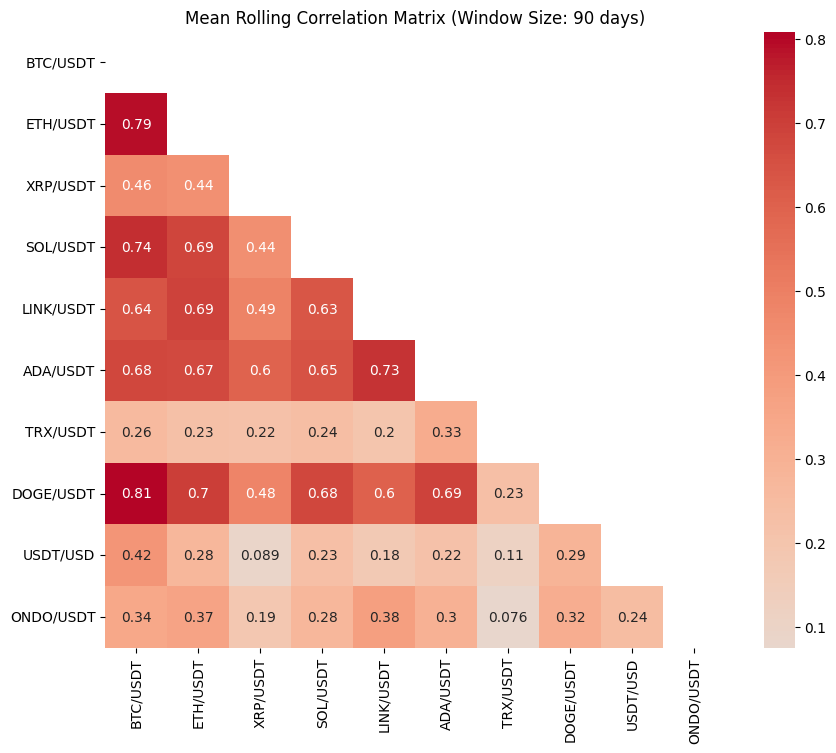

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 모든 행과 열이 출력되도록 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

# 결과 출력 및 시각화
for window, result in rolling_corr_results.items():
    # 상관 행렬을 DataFrame으로 변환
    result_df = result.dropna(how='all')
    print(f"\n[Window = {window} days] Mean Correlation Matrix\n", result_df)
    
    # 히트맵 시각화
    plt.figure(figsize=(10, 8))
    
    # 대각선 요소를 마스킹
    mask = np.triu(np.ones(result_df.shape, dtype=bool))
    
    sns.heatmap(result_df, annot=True, cmap='coolwarm', center=0, mask=mask)
    plt.title(f'Mean Rolling Correlation Matrix (Window Size: {window} days)')
    plt.show()

## 토론 (Discussions)

::: {.callout-important}
변수들의 관찰 주기 (단기? 장기?)에 따라 또는 관찰 시기 (10년전? 지금?)에 따라 변수들 간의 **선형관계**는 유지되지 않을 수 있습니다. 2025년 현재 비트코인 (BTC) 가격은 시장 심리, 규제 변화, 기술적 요인 등에 크게 영향을 받고 있습니다. 
:::

- 상관계수가 낮은 암호화폐 자산 조합을 식별하고, 헤지 투자 전략을 논의.
- 특정 암호화폐 간의 높은 상관관계가 나타나는 이유 및 그에 따른 리스크 분석.

2024년 3월부터 2025년 2월까지 암호화폐 시장에 큰 영향을 미친 주요 변화 시기와 원인:

1. 비트코인 반감기 (2024년 4월 20일): 비트코인 채굴 보상이 6.25 BTC에서 3.125 BTC로 절반으로 감소. 이는 비트코인의 공급 감소로 이어져 가격에 상승 압력을 가함.
2. 비트코인 ETF 자금 유입 증가 (2024년 10월): 비트코인 ETF로의 지속적인 자금 유입이 관찰됨. 10월까지 ETF 투자자들이 총 345,200 BTC(200억 달러 이상의 가치)를 매입.
3. 트럼프의 대통령 당선 (2024년 11월): 도널드 트럼프가 "암호화폐 대통령"이 되겠다는 공약을 내세우며 당선됨. 이는 암호화폐 시장에 대한 긍정적인 기대감을 불러일으킴.
4. EU의 암호화폐 시장 규제(MiCA) 전면 시행 (2024년 12월 30일): 유럽연합에서 암호화폐 시장 규제(MiCA)가 전면 시행됨. 이로 인해 EU 전역에서 암호화폐 서비스 제공업체들에 대한 통일된 규제 프레임워크가 적용되기 시작.
5. 트럼프의 암호화폐 정책 발표 (2025년 1월): 트럼프 대통령이 취임 후 미국을 "암호화폐의 수도"로 만들겠다는 계획을 발표함. 여기에는 비트코인 전략적 비축 등의 아이디어가 포함됨.

stars and bins에서 위의 변화 시기가 bins 역할을 한다는 가정하여, 기간 stars을 다음과 같이 나누어 상관관계를 conditional 해 본다.

1. 20224년 3월 1일 (관측기간 시작일) - 2024년 4월 20일
2. 2024년 4월 21일 - 2024년 9월 30일
3. 2024년 10월 1일 - 2024년 11월 5일
4. 2024년 11월 6일 - 2024년 12월 31일
5. 2025년 1월 1일 - 2025년 2월 28일 (관측기간 종료일)

변화를 $Z$로 표기했다면, covariance decomposition formula에 의해,

(추후 계속)

---

## 부록: Conditioning Theorems in Probability Theory

### Adam's Law: Smoothing Property of Conditional Expectation
Also known as the **Law of Total Expectation** or **Law of Iterated Expectations**.

If $X$ is a random variable whose expectation $E(X)$ is defined and $Z$ is any random variable defined on the same probability space, then:
$$E(X) = E(E(X|Z)).$$

A conditional expectation can be viewed as a Radon–Nikodym derivative, making the tower property a direct consequence of the chain rule for conditional expectations.

A special discrete case:
If $\{Z_{i}\}$ is a finite or countable partition of the sample space, then:
$$E(X) = \sum_{i} E(X \mid Z_i)P(Z_i).$$


### Eve's Law: Variance Decomposition Formula
Known as the **Conditional Variance Formula** or the **Law of Iterated Variances**.

If $X$ and $Y$ are random variables defined on the same probability space, and if $Y$ has finite variance, then:

$$\operatorname{Var}(Y)=E[\operatorname{Var}(Y\mid X)]+\operatorname{Var}(E[Y\mid X]).$$

This is a special case of the covariance decomposition formula.

Applications: Explained by X, on average
-  분산 = “(조건부 분산)의 평균” + “(조건부 평균)의 분산"

- **Analysis of Variance (ANOVA)**: Variability in $Y$ splits into an “unexplained” within-group variance and an “explained” between-group variance. The F-test examines if the explained variance is significantly large, indicating a meaningful effect of $X$ on $Y$.

- **Linear Regression Models**: The proportion of explained variance is measured as $R^2$. For simple linear regression (single predictor), $R^2$ equals the squared Pearson correlation coefficient between $X$ and $Y$.

- **Machine Learning and Bayesian Inference**: In many Bayesian and ensemble methods, one decomposes prediction uncertainty via the law of total variance. For a Bayesian neural network with random parameters $\theta$: $\operatorname {Var} (Y)=\operatorname {E} {\bigl [}\operatorname {Var} (Y\mid \theta ){\bigr ]}+\operatorname {Var} {\bigl (}\operatorname {E} [Y\mid \theta ]{\bigr )}$ often referred to as “aleatoric” (within-model) vs. “epistemic” (between-model) uncertainty

- **Information Theory**: For jointly Gaussian $(X,Y)$, the fraction $\operatorname {Var} (\operatorname {E} [Y\mid X])/\operatorname {Var} (Y)$ relates directly to the mutual information $I(Y;X)$. In non-Gaussian settings, a high explained-variance ratio still indicates significant information about Y contained in X

**Example 1 (Exam Scores)**: Suppose students' exam scores vary between two classrooms. The variance of all scores ($Y$) can be decomposed into the variance within classrooms (unexplained) and the variance between classroom averages (explained), reflecting differences in teaching quality or resources.

**Example 2 (Mixture of Two Gaussians)**: Consider $Y$ as a mixture of two normal distributions, where the mixing distribution is Bernoulli with parameter $p$. Suppose:

$$Y \mid (X=0) \sim N(\mu_0, \sigma_0^2), \quad Y \mid (X=1) \sim N(\mu_1, \sigma_1^2).$$

Then the law of total variance gives:

$$\operatorname{Var}(Y) = p\sigma_1^2 + (1-p)\sigma_0^2 + p(1-p)(\mu_1 - \mu_0)^2.$$


### Covariance Decomposition Formula
Known as the **Law of Total Covariance** or **Conditional Covariance Formula**.

If $X$, $Y$, and $Z$ are random variables defined on the same probability space, with finite covariance between $X$ and $Y$, then:

$$\operatorname{cov}(X,Y)=E[\operatorname{cov}(X,Y\mid Z)]+\operatorname{cov}(E[X\mid Z],E[Y\mid Z]).$$

This relationship is a particular instance of the general Law of Total Cumulance and is crucial for analyzing dependencies among variables conditioned on a third variable or groupings.

### Bias-Variance Decomposition of MSE

**Key:** The Bias-Variance Decomposition emphasizes the **trade-off** between making $\hat{Y}$ reliably close to its own expected value (low variance) and aligning that expected value with the true target $\mathbb{E}[Y]$ (low bias).

In many estimation or prediction settings, we have a random outcome $Y$ and an estimator (or model prediction) $\hat{Y}$. The **Mean Squared Error (MSE)** of $\hat{Y}$ is:

$$
\mathrm{MSE}(\hat{Y})
= \mathbb{E}\bigl[(Y - \hat{Y})^2\bigr].
$$

If we decompose $\hat{Y}$ around its expected value, we can split MSE into a **bias** term and a **variance** term (plus any irreducible noise in certain contexts). Formally, assume

$$
\hat{Y} = f(X) + \text{estimation noise},
\quad
Y = f(X) + \varepsilon,
$$

where $\varepsilon$ is an irreducible error term with mean zero (e.g., observational or inherent noise). Then:

$$
\begin{aligned}
\mathrm{MSE}(\hat{Y})
&= \mathbb{E}\bigl[(Y - \hat{Y})^2\bigr]\\
&= \underbrace{\mathbb{E}\Bigl[\bigl(\hat{Y} - \mathbb{E}[\hat{Y}]\bigr)^2\Bigr]}_{\text{Variance}(\hat{Y})}
\;+\;
\underbrace{\Bigl(\mathbb{E}[\hat{Y}] \;-\; \mathbb{E}[Y]\Bigr)^2}_{\text{Bias}(\hat{Y})^2}
\;+\;
\underbrace{\mathbb{E}\bigl[\varepsilon^2\bigr]}_{\text{Irreducible noise}},
\end{aligned}
$$

where:
1. **Variance**: $\text{Var}(\hat{Y})$ represents how much $\hat{Y}$ fluctuates around its own mean.
2. **Bias**: $\text{Bias}(\hat{Y})^2$ measures how far $\hat{Y}$ (on average) deviates from the true mean $\mathbb{E}[Y]$.
3. **Irreducible noise**: $\mathbb{E}[\varepsilon^2]$ is the part of the error that cannot be reduced by any estimator.

In a strictly theoretical sense (when $\varepsilon$ is embedded in $Y$), one often writes the **Bias-Variance decomposition** as:

$$
\mathrm{MSE}(\hat{Y})
= \underbrace{\mathrm{Var}(\hat{Y})}_{\text{Variance term}}
\;+\;
\underbrace{\mathrm{Bias}(\hat{Y})^2}_{\text{Bias term}}.
$$

Here, if there is additional irreducible noise, it appears as a separate constant term. This decomposition closely aligns with the Law of Total Variance (Eve’s Law) in the sense that the total mean squared difference can be split into a “spread around the estimator’s mean” plus the “squared difference of that mean from the true value,” mirroring how variance itself decomposes into conditional components.